<p style="text-align: center;"> COST-EFFICIENT DEFENCE AGAINST UNMANNED AERIAL SYSTEMS </p>

---

In [64]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

from simulation import Simulation
from sim_utils import get_combinations, sample_poisson_threats
from asset import Asset
from threat import Threat

from utils import read_json

In [66]:
objects = read_json("objects")
threats = objects["threats"]
combinations = get_combinations(objects)
combinations

[({'type': 'active radar',
   'value': 1000,
   'parameters': {'MC': {'a': 0.00718,
     'b': -0.184,
     'c': 1.24,
     'xmin': 2,
     'xmax': 10.5},
    'FW': {'a': 0.00267, 'b': -0.12, 'c': 1.43, 'xmin': 5, 'xmax': 20}},
   'night_mode': 1},
  {'type': 'jamming',
   'value': 2,
   'parameters': {'MC': {'a': 0.05,
     'b': -0.5,
     'c': 1.35,
     'xmin': 1,
     'xmax': 5},
    'FW': {'a': 0.05, 'b': -0.5, 'c': 1.35, 'xmin': 1, 'xmax': 0}},
   'night_mode': 1}),
 ({'type': 'active radar',
   'value': 1000,
   'parameters': {'MC': {'a': 0.00718,
     'b': -0.184,
     'c': 1.24,
     'xmin': 2,
     'xmax': 10.5},
    'FW': {'a': 0.00267, 'b': -0.12, 'c': 1.43, 'xmin': 5, 'xmax': 20}},
   'night_mode': 1},
  {'type': 'spoofing',
   'value': 20,
   'parameters': {'MC': {'a': 0.67,
     'b': -1.8,
     'c': 1.2,
     'xmin': 0.2,
     'xmax': 1},
    'FW': {'a': 0.67, 'b': -1.8, 'c': 1.2, 'xmin': 0.2, 'xmax': 1}},
   'night_mode': 1}),
 ({'type': 'active radar',
   'value': 1000,

In [67]:
lambdas = {
    "MC": 8,
    "FW": 2
}

In [ ]:
def simulate_all_combinations():
    
    value = 1_000_000
    result_dict = {}
    visibility_coeff = 1
    
    for combo in combinations:
        effectors = [combo[1]]
        observers = [combo[0]]
        asset = Asset(value, effectors, observers, visibility_coeff)
        
        def generate_threats():
            return sample_poisson_threats(asset, objects["threats"], lambdas)
        
        threats = generate_threats() #[Threat(**objects["threats"][i], asset=asset) for i in range(2)]
        sim = Simulation(asset, threats, generate_threats=generate_threats)
        avg_cost, cost_std, prob = sim.simulate_n_attacks(1_000)
        
        result_dict[f"{effectors[0]['type']}-{observers[0]['type']}"] = {"avg_cost": avg_cost, "cost_std": cost_std, "prob": prob}
    
    return result_dict

In [69]:
sim_res = simulate_all_combinations()

9
{'MC': {'a': 0.00718, 'b': -0.184, 'c': 1.24, 'xmin': 2, 'xmax': 10.5}, 'FW': {'a': 0.00267, 'b': -0.12, 'c': 1.43, 'xmin': 5, 'xmax': 20}}


KeyError: <ThreatE.MC: 'MC'>

In [ ]:
sim_res

{'jamming-active radar': {'avg_cost': np.float64(1301.3026),
  'cost_std': np.float64(36068.17318285518),
  'prob': 0.0013},
 'spoofing-active radar': {'avg_cost': np.float64(19720.094),
  'cost_std': np.float64(139109.04495578702),
  'prob': 0.0197},
 'rf-active radar': {'avg_cost': np.float64(0.0),
  'cost_std': np.float64(0.0),
  'prob': 0.0},
 'remote weapon station-active radar': {'avg_cost': np.float64(24629.52),
  'cost_std': np.float64(155088.5623396181),
  'prob': 0.0246},
 'jamming-low-cost': {'avg_cost': np.float64(9700.0291),
  'cost_std': np.float64(98010.03844273533),
  'prob': 0.0097},
 'spoofing-low-cost': {'avg_cost': np.float64(26900.5649),
  'cost_std': np.float64(161794.5902059886),
  'prob': 0.0269},
 'rf-low-cost': {'avg_cost': np.float64(8400.2604),
  'cost_std': np.float64(91268.5950000579),
  'prob': 0.0084},
 'remote weapon station-low-cost': {'avg_cost': np.float64(26005.226),
  'cost_std': np.float64(159167.14884395874),
  'prob': 0.026},
 'jamming-mid-segme

In [ ]:
avg_costs = []
cost_stds = []

for k, v in sim_res.items():
    avg_costs.append(v["avg_cost"])
    cost_stds.append(v["cost_std"])

Text(0, 0.5, 'Average cost of destroyed assets')

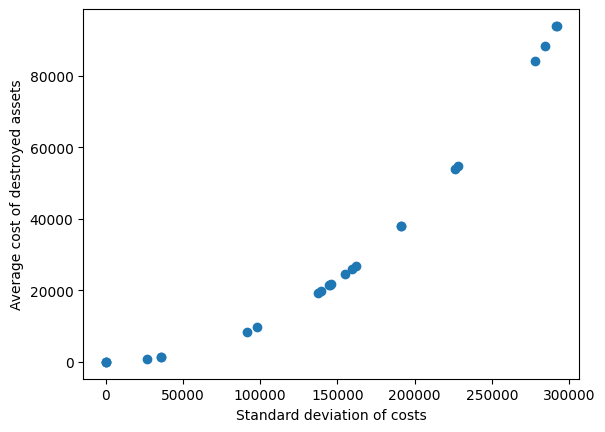

In [49]:
plt.scatter(cost_stds, avg_costs)
plt.xlabel("Standard deviation of costs")
plt.ylabel("Average cost of destroyed assets")